In [ ]:

!python main.py --class_config 2


2025-04-20 05:36:07.764773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745127367.804161    8564 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745127367.815113    8564 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-20 05:38:39.138559: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152

In [ ]:
!pip install matplotlib seaborn




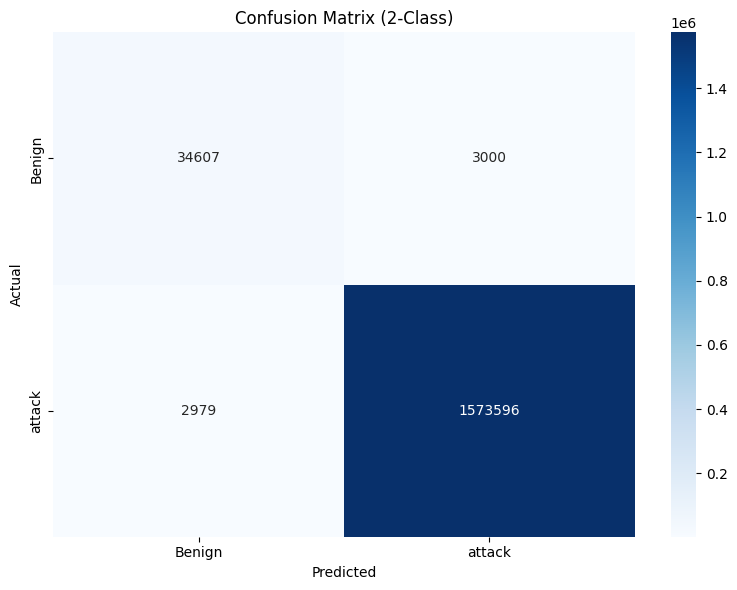

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reconstruct ground truth and predicted labels
# [[TP Benign, FN Benign], [FP attack, TP attack]]
cm = np.array([[34607, 3000], [2979, 1573596]])

# Ground truth: 37607 Benign, 1576575 attack
y_test_decoded = ['Benign'] * 37607 + ['attack'] * 1576575

# Predicted: 34607 Benign correctly, 2979 attack misclassified as Benign
#            3000 Benign misclassified as attack, 1573596 attack correctly classified
y_pred =     ['Benign'] * 34607 + ['attack'] * 3000 + \
             ['Benign'] * 2979 + ['attack'] * 1573596

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=["Benign", "attack"])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "attack"], yticklabels=["Benign", "attack"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test_decoded, y_pred, "Confusion Matrix (2-Class)")




In [ ]:
%cd /content/drive/MyDrive/sh/src/
%ls

/content/drive/MyDrive/sh/src
data_loader.py  main.py  model.py  __pycache__/  ss.py


In [ ]:
!python main.py --class_config 6

2025-04-21 04:08:59.585129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745208539.626323    2344 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745208539.638468    2344 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 04:08:59.675570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_s

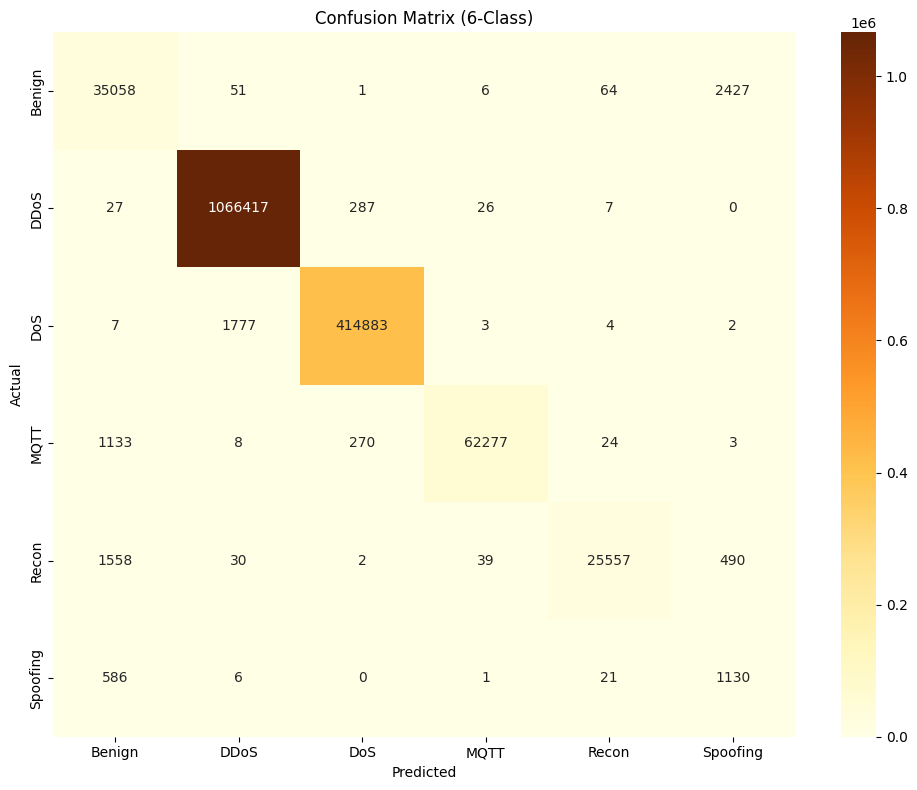

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define class labels (in the correct order!)
class_names = ['Benign', 'DDoS', 'DoS', 'MQTT', 'Recon', 'Spoofing']

# Reconstruct the confusion matrix from your output
conf_matrix = np.array([
    [35058,     51,      1,      6,     64,   2427],  # Benign
    [   27, 1066417,   287,     26,      7,      0],  # DDoS
    [    7,   1777, 414883,      3,      4,      2],  # DoS
    [ 1133,      8,    270,  62277,     24,      3],  # MQTT
    [ 1558,     30,      2,     39,  25557,    490],  # Recon
    [  586,      6,      0,      1,     21,   1130],  # Spoofing
])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (6-Class)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [2]:
%cd /content/drive/MyDrive/sh/src/
%ls

/content/drive/MyDrive/sh/src
data_loader.py  main.py  model.py  __pycache__/  results_19class.npz  ss.py


In [12]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.stderr = open(os.devnull, 'w')



In [13]:
!python main.py --class_config 19

E0000 00:00:1745276746.409139    3526 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745276746.504537    3526 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
^C


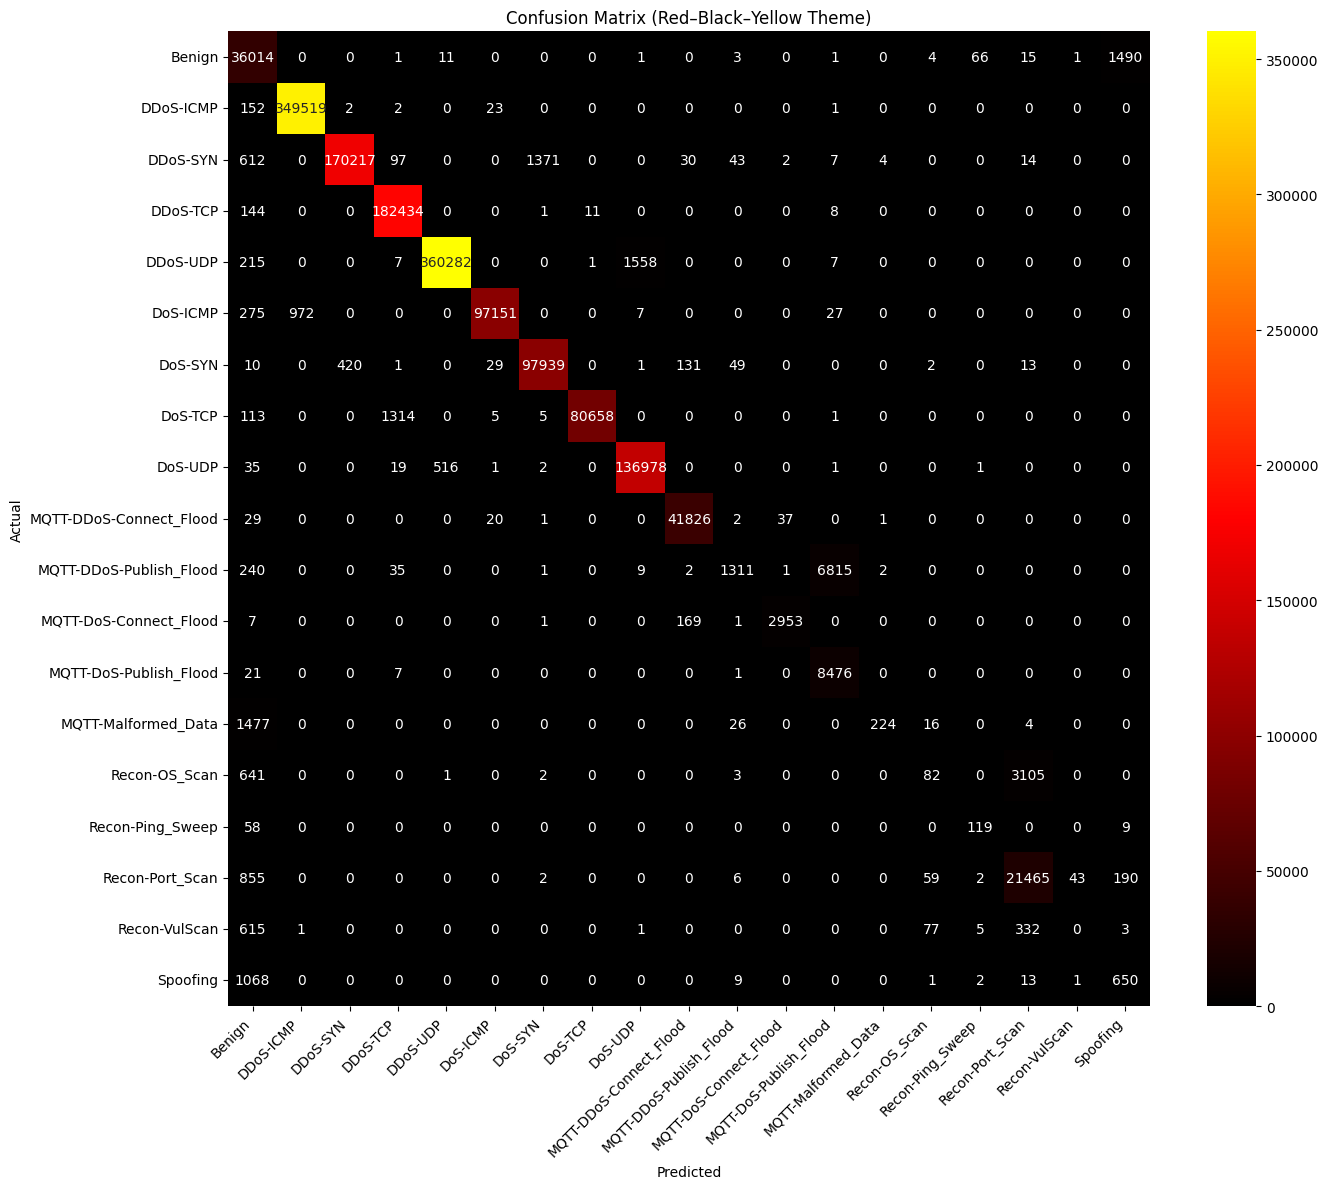

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load your .npz file (replace with your actual filename/path)
data = np.load("results_19class.npz", allow_pickle=True)
conf_matrix = data["conf_matrix"]

# Define class labels (as before)
class_names = [
    'Benign', 'DDoS-ICMP', 'DDoS-SYN', 'DDoS-TCP', 'DDoS-UDP',
    'DoS-ICMP', 'DoS-SYN', 'DoS-TCP', 'DoS-UDP',
    'MQTT-DDoS-Connect_Flood', 'MQTT-DDoS-Publish_Flood',
    'MQTT-DoS-Connect_Flood', 'MQTT-DoS-Publish_Flood',
    'MQTT-Malformed_Data', 'Recon-OS_Scan', 'Recon-Ping_Sweep',
    'Recon-Port_Scan', 'Recon-VulScan', 'Spoofing'
]

# 🎨 Create custom colormap from black → red → yellow
colors = ["black", "red", "yellow"]
cmap = LinearSegmentedColormap.from_list("red_black_yellow", colors)

# 🔥 Plot the confusion matrix with the custom colormap
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap,
            xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Red–Black–Yellow Theme)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
